In [44]:
import serial
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import statistics as stats
from datetime import datetime

def removevalue(oglist, value):
    newlist = []
    for i in oglist:
        newlist.append(i - value)
        
    return newlist

def timecorrection(oglist):
    newlist = []
    
    for i in oglist:
        newlist.append(i/1000)
    return newlist

def removeduplicates(a, colum):
    count = 0
    rowlist = []

    for i in range(len(a[colum]) - 1):
        if (a[colum][i] == a[colum][i+1]):
            rowlist.append(i +1)
        
    for i in rowlist:
        a = a.drop(index = i)
        
    a = a.reset_index(drop = True)

    return a
            
def currentconvert(x):
    return(np.divide(np.subtract(x,-0.00019517069237944863), 0.000894810692382359))
    



ser = serial.Serial('/dev/cu.usbserial-110', baudrate = 250000)

In [61]:
filename = "Nov21_23_flash2"
sample_name = "Dry Carbon 0.0106, 8 Volts"
date = datetime.now()



In [53]:

ser.write(("5000;").encode("utf-8"))

avdata = []
for i in range(50):
    x = ser.readline()
    x = int(x) >> 4
    result = x / 4096 * 2
    avdata.append(result)
    
    
count = ser.readline()
count = count.decode("utf-8")
count = int(count)


timedata = []
runningtime = 0
ser.write((";").encode("utf-8"))
for i in range(count):
    time = ser.readline()
    time = int(time.decode('utf-8'))
    runningtime += time
    timedata.append(time)

    
values = []
ser.write((";").encode("utf-8"))
for i in range(count):
    value = int((ser.readline()).decode('utf-8'))
    value = value >> 4
    value = value / 4096 * 2
    values.append(value)

In [35]:
print(count)

27758


In [473]:
print(len(values))

27758


In [54]:
averagebackground = sum(avdata)/50
correctedvalues = []
for i in values:
    x = -(i - averagebackground)
    correctedvalues.append(x)
    
timemillis = timecorrection(timedata)

In [55]:
current = currentconvert(correctedvalues)


In [56]:
print(len(current))

27758


In [57]:
fulldata = pd.DataFrame()


fulldata["Time"] = timemillis
fulldata["Current"] = current




In [58]:
fulldata['Current']

0          6.089642
1         11.000772
2          4.998280
3          5.543961
4         10.455091
            ...    
27753    115.771536
27754    120.136984
27755    110.314725
27756    125.593795
27757    117.954260
Name: Current, Length: 27758, dtype: float64

In [59]:
print(float(fulldata['Current'].mean()))

74.45081146208351


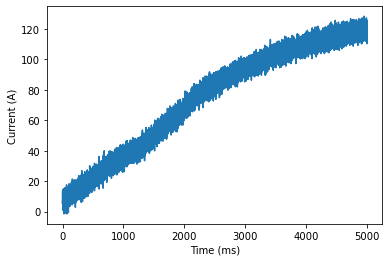

In [60]:
plt.plot(fulldata['Time'], fulldata['Current'])
plt.xlabel("Time (ms)")
plt.ylabel('Current (A)')
plt.show()

In [62]:
path = Path("/Users/christiannorman/Documents/Crus Center/Scholar/FJH/data/" + filename)


file = open(path, "w")
file.write("Date: " + str(date) + "\n")
file.write("Sample: " + sample_name + "\n\n")

file.close()


fulldata.to_csv(path, ",", mode = "a")

In [231]:
zeroamp30msflash = fulldata

In [240]:
tenamp30msflash = fulldata

In [249]:
seventeenamp30msflash = fulldata

In [260]:

print(stats.mean(zeroamp30msflash['Current']), stats.mean(tenamp30msflash['Current']), stats.mean(seventeenamp30msflash['Current']))

-1.0482245651070898 28.035707891922538 29.809809093208866


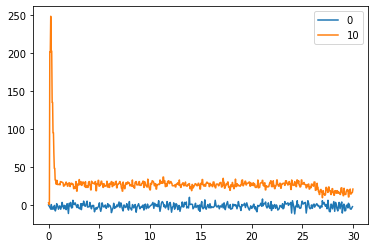

In [284]:
plt.plot(zeroamp30msflash['Time'], zeroamp30msflash['Current'], label = "0")
plt.plot(tenamp30msflash['Time'], tenamp30msflash['Current'], label = '10')
#plt.plot(seventeenamp30msflash['Time'], seventeenamp30msflash['Current'], label = '17')
plt.legend()

In [283]:
print(len(tenamp30msflash['Time']))

694


In [297]:
for i in range(695):
    if (tenamp30msflash['Time'][i] >= 2.5):
        print(i)
        break
    
    


58


In [294]:
testlist = list(tenamp30msflash['Current'])[0: 58]

In [298]:
pd.set_option('display.max_rows', 1000)
display(tenamp30msflash[0:58])

,Time,Current
0,0.000,3.350323
1,0.040,1.167599
2,0.084,1.167599
3,0.124,201.978230
4,0.172,201.978230
5,0.216,248.906802
6,0.268,203.069592
7,0.312,203.069592
8,0.356,135.405141
9,0.400,135.405141


In [296]:
stats.mean(testlist)

17.78729256035623

In [ ]:
#average after 5ms for 17amp flash: 27.999926375572198
#average after 5ms for 10amp flash: 25.906716675935233
#average after 5ms for 10amp flash: 17.78729256035623